In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import norm, boxcox
from scipy import stats

In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Cheking no. of rows and columns
# name of columns.
# type of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# checking 5 number summary.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Checking null
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# checking outliers

In [6]:
# I am using blox plot to identify the outliers

<AxesSubplot:ylabel='Annual Income (k$)'>

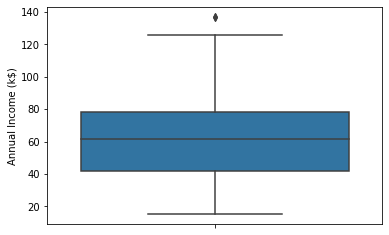

In [7]:
sns.boxplot(y="Annual Income (k$)", data=df)

**# treating the outliers.**

In [8]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

In [9]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -13.25
up_limit is 132.75


In [10]:
outlier = []
for x in df['Annual Income (k$)']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [137, 137]


In [11]:
len(outlier)
# there is only 2 outlier value

2

In [12]:
# We are replacing outlier with median.
# beacuse the total no. of observation are low.
# so we can not drop those outliers value.
# median are not affected by outlier.

In [13]:
#replacing outlier value which is 137 with median=61.5
df.loc[df['Annual Income (k$)'] >= 137, 'Annual Income (k$)'] = 61.5

<AxesSubplot:ylabel='Annual Income (k$)'>

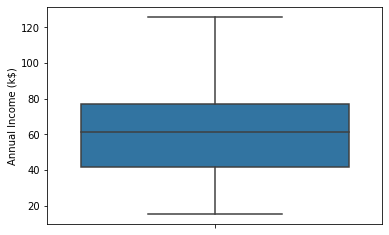

In [14]:
#outlier is removed now
sns.boxplot(y="Annual Income (k$)", data=df)

<AxesSubplot:ylabel='Spending Score (1-100)'>

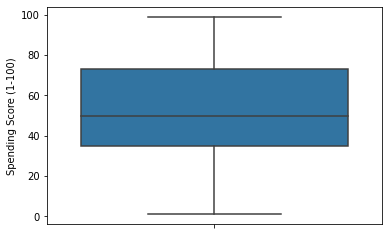

In [15]:
#checking outlier for Spending Score
sns.boxplot(y="Spending Score (1-100)", data=df)
# no outlier

<AxesSubplot:ylabel='Age'>

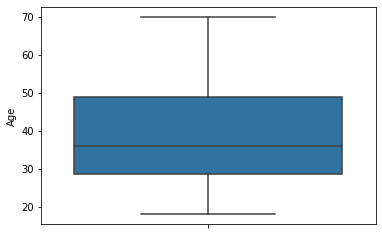

In [16]:
#checking outlier for Age
sns.boxplot(y="Age", data=df)
# no outlier

# checking skewness for spending score

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


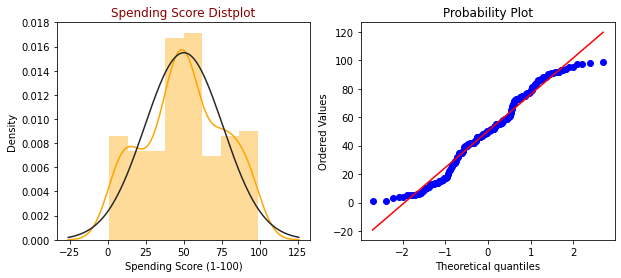

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["Spending Score (1-100)"], fit=norm, color="orange")
plt.title("Spending Score Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["Spending Score (1-100)"], plot = plt)
plt.show()

In [18]:
# no need for skewness correction

**# checking skewness for Annual income**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


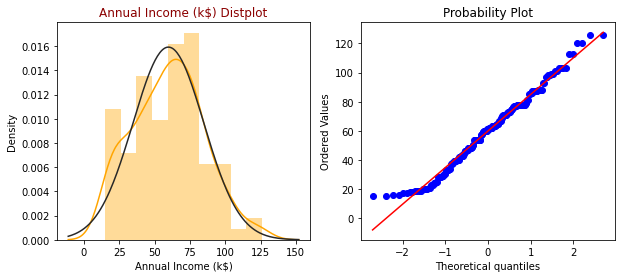

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["Annual Income (k$)"], fit=norm, color="orange")
plt.title("Annual Income (k$) Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["Annual Income (k$)"], plot = plt)
plt.show()

In [20]:
# no need for skewness correction

# Visualizing the annual income vs spending score.
# This will help us in deciding how many cluster we need.

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

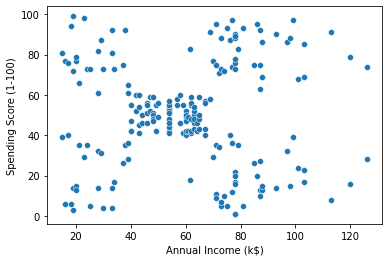

In [21]:
sns.scatterplot(x="Annual Income (k$)",
                    y="Spending Score (1-100)",
                    data=df)

In [22]:
# making cluster on these two features 1. annual income 2. spending score

In [23]:
clus = df.iloc[:,[3,4]].values

In [24]:
# first we need to decide the number of cluster
# for this we use elbow curve.
# by seeing the elbow curve and ealier scater plot we can easily decide
#how many cluster we accuanly need.

In [25]:
# wcss= within cluster sum of sqaures
# we need to calculate the wcss beucase we need the elbow curve
# to identify the no. of cluster requirement.
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(clus)

  wcss.append(kmeans.inertia_)

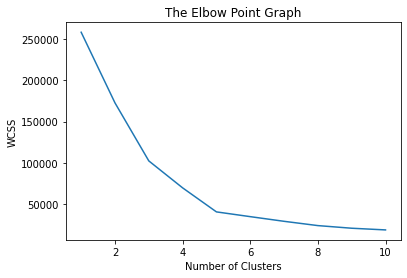

In [26]:
# draw elbow graph

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')

plt.show()

In [27]:
# optimum value of cluster is 6
# we choose the no. of cluster after which the decrease in wcss become low or almost constant.

In [28]:
# training the k means algo
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(clus)

print(Y)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 5 2 5 2 5 2
 5 2 5 2 5 2 5 2 5 2 5 2 5 2 0]


In [29]:
print(np.unique(Y))
#no. of cluster

[0 1 2 3 4 5]


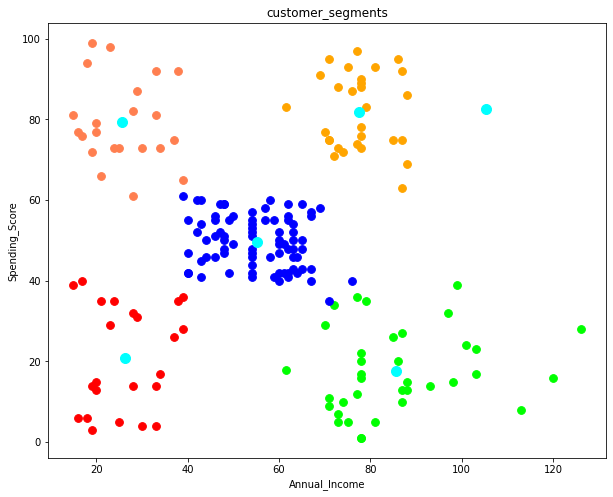

In [30]:

plt.figure(figsize=(10,8))
plt.scatter(clus[Y==0,0], clus[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(clus[Y==1,0], clus[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(clus[Y==2,0], clus[Y==2,1], s=60, c='lime', label='Cluster 3')
plt.scatter(clus[Y==3,0], clus[Y==3,1], s=60, c='coral', label='Cluster 4')
plt.scatter(clus[Y==4,0], clus[Y==4,1], s=60, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('customer_segments')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

In [31]:
# In the above graph we have only 5 cluster and we accutaly write the code for 6 cluster.
# so we can say that we only need 5 cluster.
# now we will optimize our code to get 5 cluster.

In [32]:
# training the k means algo
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(clus)

print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [33]:
print(np.unique(Y))
#no. of cluster

[0 1 2 3 4]


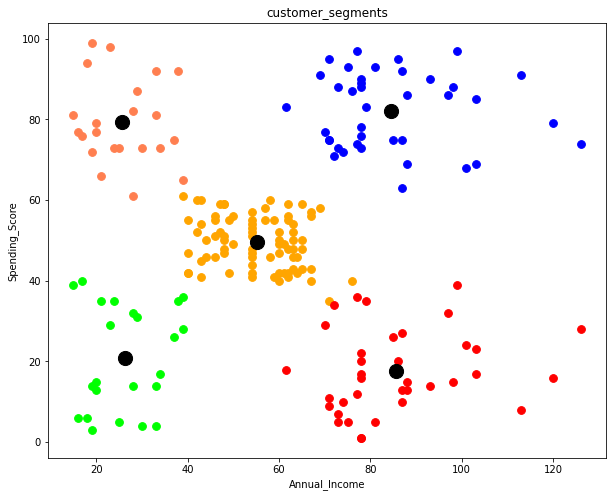

In [34]:

plt.figure(figsize=(10,8))
plt.scatter(clus[Y==0,0], clus[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(clus[Y==1,0], clus[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(clus[Y==2,0], clus[Y==2,1], s=60, c='lime', label='Cluster 3')
plt.scatter(clus[Y==3,0], clus[Y==3,1], s=60, c='coral', label='Cluster 4')
plt.scatter(clus[Y==4,0], clus[Y==4,1], s=60, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')

plt.title('customer_segments')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

# Conclusion

In [35]:
# we can clearly see the 5 cluster with distinct sepration between each datapoints.
# using this info we can run target advertisment for diffrent group with diffrent need.
# to increase our sales and profit.
# we can also decide to provide coupon and we can messure the effect of coupon on sales in diffrent groups.

#done